In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import HoverTool,ColumnDataSource,LabelSet
from bokeh.io import export_png
import numpy as np
import plotly.graph_objects as go
from ipywidgets import widgets
import seaborn as sns
from bokeh.models import BasicTickFormatter,FuncTickFormatter
from bokeh.models.formatters import CustomJSTickFormatter
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource,Label
from bokeh.palettes import Category20
from bokeh.transform import dodge

In [2]:
# Store filepath in a variable
Med_use = Path("data/MA/Medical_unit_sales.csv")
rec_use = Path("data/MA/Recreational_unit_sales.csv") 

In [3]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
Med_use_df = pd.read_csv(Med_use, encoding="ISO-8859-1")
rec_use_df = pd.read_csv(rec_use, encoding="ISO-8859-1")

In [4]:
# Show the first five rows.
Med_use_df.head()

,ï»¿RecordNo,SaleDate,ProductCategoryName,UnitOfMeasureName,TotalPrice,CountBasedTotal,DollarCountBasedTotal,WeightBasedTotal,DollarWeightBasedTotal,Quantity,CCCLastUpdated
0,1,11/5/2018,Infused (edible),Each,60.00,2,60.00,0.00,0.00,2.00,04/08/2024
1,2,11/20/2018,Infused (edible),Each,1381.90,61,1381.90,0.00,0.00,61.00,04/08/2024
2,2,11/20/2018,Concentrate (Each),Each,4931.18,101,4931.18,0.00,0.00,101.00,04/08/2024
3,2,11/20/2018,Infused (non-edible),Each,89.74,3,89.74,0.00,0.00,3.00,04/08/2024
4,2,11/20/2018,Buds,Grams,5159.59,0,0.00,441.51,5159.59,441.51,04/08/2024


In [5]:
rec_use_df.head()

,ï»¿RecordNo,SaleDate,ProductCategoryName,UnitOfMeasureName,TotalPrice,CountBasedTotal,DollarCountBasedTotal,WeightBasedTotal,DollarWeightBasedTotal,Quantity,CCCLastUpdated
0,1,11/5/2018,Infused (edible),Each,60.00,2.0,60.00,0.0,0.0,2.0,04/08/2024
1,2,11/6/2018,Infused (edible),Each,57.00,2.0,57.00,0.0,0.0,2.0,04/08/2024
2,3,11/19/2018,Buds,Grams,0.00,0.0,0.00,0.0,0.0,0.0,04/08/2024
3,3,11/19/2018,Concentrate (Each),Each,0.00,0.0,0.00,0.0,0.0,0.0,04/08/2024
4,5,11/20/2018,Infused (edible),Each,72192.26,3092.0,72192.26,0.0,0.0,3092.0,04/08/2024


In [6]:
# Show a single column
Med_use_df["ProductCategoryName"].head()

0        Infused (edible)
1        Infused (edible)
2      Concentrate (Each)
3    Infused (non-edible)
4                    Buds
Name: ProductCategoryName, dtype: object

In [7]:
source_df = Med_use_df
col_keep = ["ProductCategoryName","TotalPrice"]
source_df = Med_use_df.drop(Med_use_df.columns.difference(col_keep),axis = 1)
source_df  


,ProductCategoryName,TotalPrice
0,Infused (edible),60.00
1,Infused (edible),1381.90
2,Concentrate (Each),4931.18
3,Infused (non-edible),89.74
4,Buds,5159.59
...,...,...
24155,Concentrate (Bulk),50.40
24156,Concentrate (Each),35355.36
24157,Kief,476.61
24158,Infused (edible),75443.17


In [8]:
sorted_df = source_df.sort_values(by='ProductCategoryName')
cumulative_df = sorted_df.groupby('ProductCategoryName').agg({'TotalPrice': 'sum'}).reset_index()
cumulative_df['TotalPrice'] = cumulative_df['TotalPrice'].round(0)
cumulative_df

,ProductCategoryName,TotalPrice
0,Buds,572976415.0
1,Concentrate,9252652.0
2,Concentrate (Bulk),174460.0
3,Concentrate (Each),116130774.0
4,Immature Plants,23300.0
5,Infused (edible),183968828.0
6,Infused (non-edible),10281928.0
7,Infused Beverage,8070232.0
8,Infused Pre-Rolls,11386402.0
9,Kief,1341381.0


In [9]:
cumulative_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ProductCategoryName  16 non-null     object 
 1   TotalPrice           16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


In [10]:

source = ColumnDataSource(cumulative_df)

source1= ColumnDataSource(rec_use_df)
source

ColumnDataSource(id='p1001', ...)

In [11]:
# Create a new plot with specified title and axis labels
#p = figure(title="Bokeh Example - Scatter Plot from CSV", x_axis_label='X-axis', y_axis_label='Y-axis')
p = figure(x_range=cumulative_df['ProductCategoryName'], title="Marijuana Product Category & Sales in Billions", x_axis_label='Category', y_axis_label='Sales in Billions',width = 1600,height = 400,toolbar_location=None, tools="")
#p = figure(x_range=cumulative_df['ProductCategoryName'], title="Marijuana Product Category & Price", x_axis_label='Category', y_axis_label='Price',width = 1600,height = 400,tools="hover", tooltips="Price: @TotalPrice")

#p = figure(title="Bokeh Example - Scatter Plot from CSV", x_axis_label='X-axis', y_axis_label='Y-axis')
p1 = figure(x_range=rec_use_df['SaleDate'], title="Marijuana adult-use", x_axis_label='SaleDate', y_axis_label='Price',width = 1600,height = 400)

In [12]:
labels = LabelSet(x='ProductCategoryName', y='TotalPrice', text='TotalPrice', level='glyph',
                  x_offset=-13.5, y_offset=0, source=source, text_align='center', text_baseline='center')
p.add_layout(labels)

In [13]:
# Add a circle glyph to the plot
p.vbar(x='ProductCategoryName', top='TotalPrice', source=source_df, width=0.5, color='blue')
p.yaxis.major_label_orientation = (3.4 * 2)
p.y_range.start = 0
# p1.vbar(x='SaleDate', top='TotalPrice', source=source_df, width=0.5, color='green')
p.xaxis.major_label_orientation = (3.4 * 2)
p.yaxis.formatter.use_scientific = False

In [14]:
# Specify the name of the output file
output_file("bokeh_plot.html")

In [15]:
# Show the plot
show(p)
#show(p1)

In [16]:
# Show the last five rows.
Med_use_df.tail()

,ï»¿RecordNo,SaleDate,ProductCategoryName,UnitOfMeasureName,TotalPrice,CountBasedTotal,DollarCountBasedTotal,WeightBasedTotal,DollarWeightBasedTotal,Quantity,CCCLastUpdated
24155,24145,4/7/2024,Concentrate (Bulk),Grams,50.40,0,0.00,2.0,50.40,2.0,04/08/2024
24156,24145,4/7/2024,Concentrate (Each),Each,35355.36,1139,35355.36,0.0,0.00,1139.0,04/08/2024
24157,24145,4/7/2024,Kief,Grams,476.61,0,0.00,30.0,476.61,30.0,04/08/2024
24158,24145,4/7/2024,Infused (edible),Each,75443.17,3412,75443.17,0.0,0.00,3412.0,04/08/2024
24159,24145,4/7/2024,Infused Beverage,Each,3409.56,473,3409.56,0.0,0.00,473.0,04/08/2024


In [17]:
rec_use_df.columns

Index(['ï»¿RecordNo', 'SaleDate', 'ProductCategoryName', 'UnitOfMeasureName',
       'TotalPrice', 'CountBasedTotal', 'DollarCountBasedTotal',
       'WeightBasedTotal', 'DollarWeightBasedTotal', 'Quantity',
       'CCCLastUpdated'],
      dtype='object')

In [18]:
Med_use_df.columns

Index(['ï»¿RecordNo', 'SaleDate', 'ProductCategoryName', 'UnitOfMeasureName',
       'TotalPrice', 'CountBasedTotal', 'DollarCountBasedTotal',
       'WeightBasedTotal', 'DollarWeightBasedTotal', 'Quantity',
       'CCCLastUpdated'],
      dtype='object')

In [19]:


col_keep = ["ProductCategoryName","TotalPrice",'UnitOfMeasureName']
# Assuming df_recreational and df_medical are your dataframes
df_medical1 = Med_use_df.drop(Med_use_df.columns.difference(col_keep),axis = 1)
col_keep1 = ["ProductCategoryName","TotalPrice",'UnitOfMeasureName']
df_recreational1 = rec_use_df.drop(rec_use_df.columns.difference(col_keep1),axis = 1)
df_medical = df_medical1.groupby(['ProductCategoryName','UnitOfMeasureName']).agg({'TotalPrice': 'sum'}).reset_index()
df_recreational = df_recreational1.groupby(["ProductCategoryName",'UnitOfMeasureName']).agg({'TotalPrice': 'sum'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(
    y=df_recreational['ProductCategoryName'],
    x=df_recreational['TotalPrice'],
    name='Recreational',
    orientation='h',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    y=df_medical['ProductCategoryName'],
    x=df_medical['TotalPrice'],
    name='Medical',
    orientation='h',
    marker=dict(color='green')
))

fig.update_layout(barmode='stack',  # Use 'group' for side-by-side bars
                  title='Sales by Product and Category',
                  xaxis_title='Sales',
                  yaxis_title='Product')

fig.show()

In [20]:
## Bokeh
df_combined = pd.concat([df_medical, df_recreational])

# Create a Bokeh ColumnDataSource
source = ColumnDataSource(df_combined)

# Create a figure with a background image
p = figure(y_range=df_combined['ProductCategoryName'].unique(),
           height=400, width=700,
           title="Sales by Product and Category",
           x_axis_label='Sales', y_axis_label='Product',
           toolbar_location=None, tools="")

# Define colors for the bars
colors = Category20[20][:len(df_combined['UnitOfMeasureName'].unique())]

# Plot the bars
p.hbar(y=dodge('ProductCategoryName', -0.15, range=p.y_range), right='TotalPrice', height=0.3,
       source=source, color=colors[0], legend_label='Medical')

p.hbar(y=dodge('ProductCategoryName', 0.15, range=p.y_range), right='TotalPrice', height=0.3,
       source=source, color=colors[1], legend_label='Recreational')

# Show the plot
show(p)

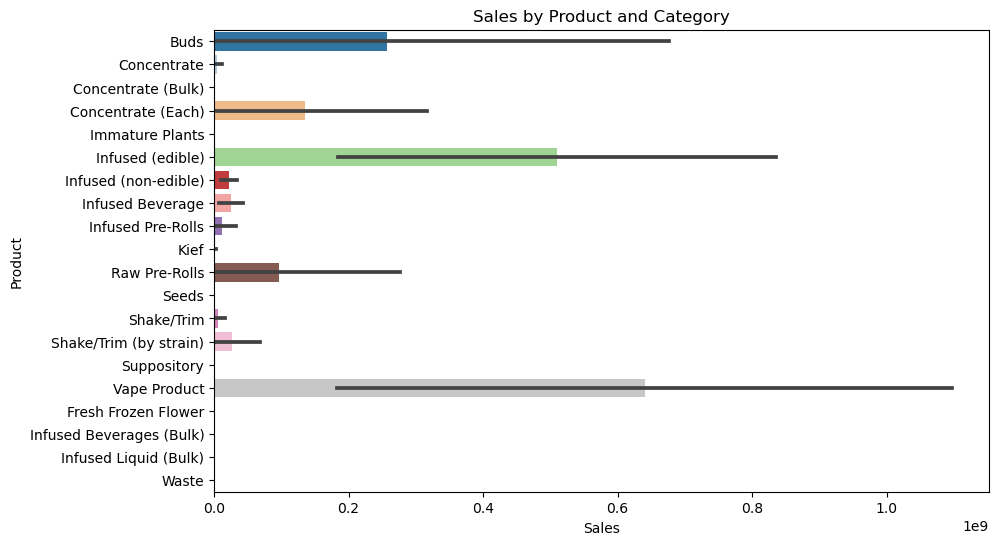

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the dataframes
df_combined = pd.concat([df_medical, df_recreational])

# Create the stacked bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalPrice', y='ProductCategoryName',  data=df_combined, orient='h', palette='tab20')

# Add labels and title
plt.xlabel('Sales')
plt.ylabel('Product')
plt.title('Sales by Product and Category')

# Show the plot
plt.show()